<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/K_Means_Clustering_End_to_End_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 K-Means Clustering: End-to-End Practice

You've already covered the theory and seen examples—now it's time to build a full **K-Means workflow**. In this hands-on lesson, we'll implement clustering step by step, from loading and preparing the data to choosing **K**, fitting the model, visualizing clusters, and interpreting results.

We'll add code incrementally (not a code dump), verifying each step as we go until you have a working, well-explained K-Means solution. Ready to turn concepts into practice?

---

## Step 1: Importing Libraries and Dataset

Before we do anything, we need to set up the environment by importing the necessary libraries and loading the dataset.

Below are the libraries we need:

* **`pandas`** for data manipulation and handling DataFrames.
* **`numpy`** for numerical operations.
* **`matplotlib`** and **`seaborn`** for visualization.
* **`StandardScaler`** for feature scaling.
* **`KMeans`** for the clustering model.
* **`calinski_harabasz_score`** (or other metrics) for evaluation.

**👉 Action:** Insert a new *Code Cell* below and run the import statements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Explore and Prepare the Data

In [3]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Step 3: Scaling the Data

In [4]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
# Creating the dataframe for the scaled data
scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
# looking at the head of it
print(scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


# Step 4A: Choose K with the Elbow Method (Inertia)

* Interpretation: pick the K at the “elbow” (for Iris, you’ll usually see a bend around K=3).

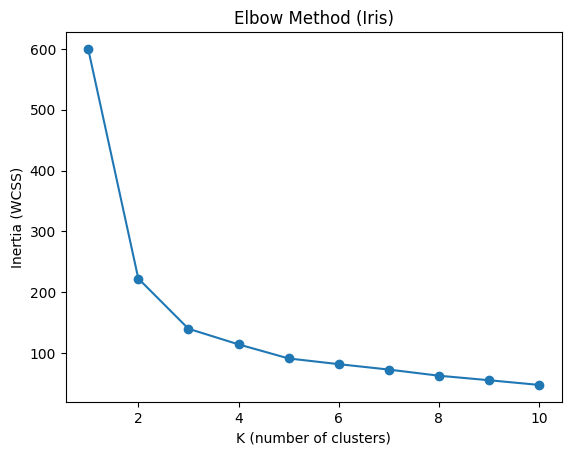

In [6]:
from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("K (number of clusters)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method (Iris)")
plt.show()

# Step 4B: Double-check K with Silhouette Score

* Silhouette measures how well-separated clusters are (range -1 to 1; higher is better). Use it to compare Ks.

* Note: We used silhouette to help select K (compare clusterings across K). Next, we’ll fit the final model with the chosen K.

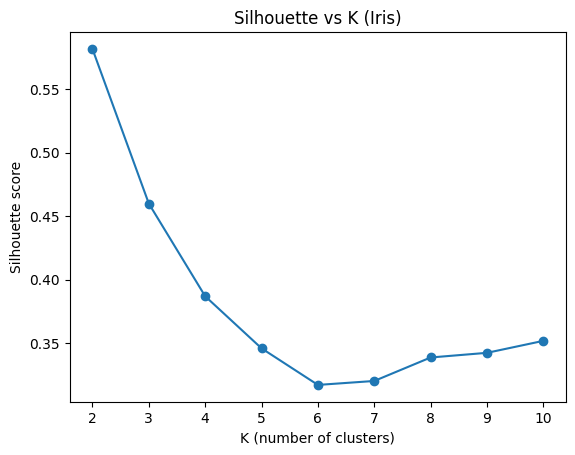

Best K by silhouette: 2


In [7]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)  # silhouette needs at least K=2

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("K (number of clusters)")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs K (Iris)")
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best K by silhouette:", best_k)



# Step 5: Applying K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

# Create KMeans model with 3 clusters. You will try 2 later.
kmeans = KMeans(n_clusters=3)

# Step 6: Training the K-Means Model

In [9]:
# Fit the model to the data
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

# Step 7: Assigning Cluster Labels

In [10]:
# Get the cluster labels
df['Cluster'] = kmeans.labels_

In [12]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


# Step 8: Visualizing the Clusters

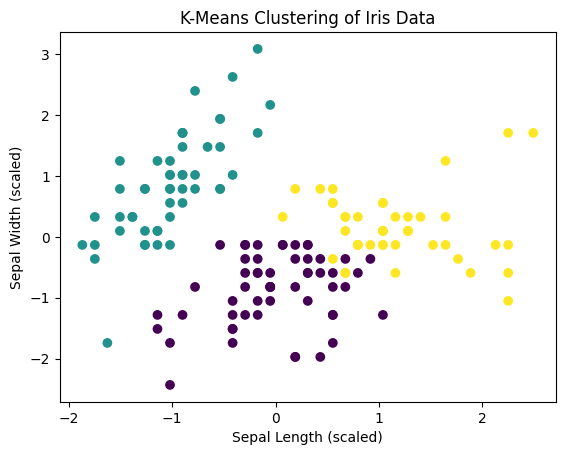

In [13]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Means Clustering of Iris Data')
plt.show()

# Step 9: Evaluating the Model with Silhouette Score

* A score closer to 1 means the clusters are well-defined.

In [14]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4630420362927048


# 💡 Check For Understanding: Advanced Tasks

Now that you have built a complete K-Means workflow using the Iris dataset, try these quick tasks on your own to solidify your understanding.

## Task 1: Change the Number of Clusters ($K$)

Experimenting with different values of $K$ is crucial for understanding the model's sensitivity.

* **Reruns:** Re-run your K-Means model two more times with different settings:
    * Set **`n_clusters=2`**.
    * Set **`n_clusters=4`**.
* **Evaluation:** For each run (including your original run with $K=3$):
    * Calculate the **Silhouette Score**.
    * **Question:** How does the Silhouette Score change compared to 3 clusters? Which setting gives the best score?

---

## Task 2: Try Different Features

Clustering results are highly dependent on the features you select.

* **Feature Selection:** Instead of using all four features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`), try clustering with **only `petal_length` and `petal_width`**.
* **Visualization:**
    * Fit and predict the K-Means model (use $K=3$ for comparison).
    * Visualize the resulting clusters (you can use a 2D scatter plot).
* **Question:** Do the clusters look cleaner or messier compared to using all features? (Hint: Think about which features separate the species most effectively).

---

## Task 3: Interpret the Results

Clustering is Unsupervised Learning, meaning it doesn't know the 'correct' labels.

* **Discussion:** If the clusters you find **don't perfectly match** the actual species labels (`setosa`, `versicolor`, `virginica`) in the dataset, is that necessarily a problem?
* **Core Question:** Why might K-Means group the flowers differently than the real labels? (Hint: What property does K-Means optimize, and what does the species label represent?)

# Adım 1: Kütüphaneleri ve Veri Setini İçe Aktarma

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.datasets import load_iris

# Iris veri setini yükle
iris = load_iris()
# Veri setini bir DataFrame'e dönüştür
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Species (tür) etiketlerini de ekle, ancak kümelemede KULLANMAYACAĞIZ
df['species'] = iris.target_names[iris.target]

print("Veri Setinin İlk 5 Satırı:")
print(df.head())

Veri Setinin İlk 5 Satırı:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# Adım 2: Veri Ön İşleme (Feature Scaling)

In [16]:
# Sadece sayısal özellikleri seç
X = df.drop('species', axis=1)

# StandardScaler'ı başlat
scaler = StandardScaler()

# Veriyi Standardize et ve bir NumPy dizisi al
X_scaled = scaler.fit_transform(X)

print("\nÖlçeklenmiş Veri Setinin İlk Satırı (Örnek):")
print(X_scaled[0])


Ölçeklenmiş Veri Setinin İlk Satırı (Örnek):
[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


# Adım 3: Optimal Küme Sayısını ($K$) Belirleme (Elbow Metodu)


* K-Means'in en büyük kısıtlaması olan $K$ sayısını belirlemek için genellikle Dirsek Metodu (Elbow Method) kullanılır. Bu metot, Küme İçi Kareler Toplamı'nın (Inertia) azaldığı, grafikte dirsek oluşturan noktayı ararız.

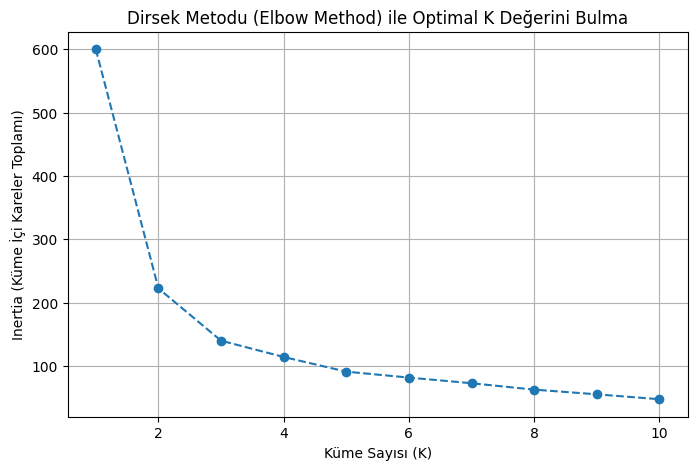


Seçilen Optimal K Değeri (Grafiğe göre): 3


In [17]:
inertia = []
K_range = range(1, 11) # K'yı 1'den 10'a kadar dene

for k in K_range:
    # Modelin her çalışmasında fit işlemini gerçekleştir
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Dirsek Grafiğini Çiz
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Dirsek Metodu (Elbow Method) ile Optimal K Değerini Bulma')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Inertia (Küme İçi Kareler Toplamı)')
plt.grid(True)
plt.show()

# Grafiğe baktığımızda K=3'ün iyi bir başlangıç noktası olduğunu varsayalım.
optimal_k = 3
print(f"\nSeçilen Optimal K Değeri (Grafiğe göre): {optimal_k}")

# Adım 4: K-Means Modelini Eğitme ve Küme Atama

* Seçtiğimiz $K=3$ değerini kullanarak K-Means modelini eğitelim ve veri setindeki her noktaya bir küme etiketi atayalım.

In [18]:
# K=3 ile K-Means modelini oluştur ve eğit
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Her noktaya atanan küme etiketlerini al
df['cluster_label'] = kmeans.labels_

print("\nVeri Setine Atanan Küme Etiketleri (İlk 5 Satır):")
print(df[['species', 'cluster_label']].head())


Veri Setine Atanan Küme Etiketleri (İlk 5 Satır):
  species  cluster_label
0  setosa              1
1  setosa              1
2  setosa              1
3  setosa              1
4  setosa              1


# Adım 5: Kümeleme Sonuçlarını Değerlendirme ve Görselleştirme

* Modelin başarısını ölçmek için Silhouette Skoru gibi bir metrik kullanalım ve sonuçları görselleştirelim.


K=3 İçin Silhouette Skoru: 0.4599


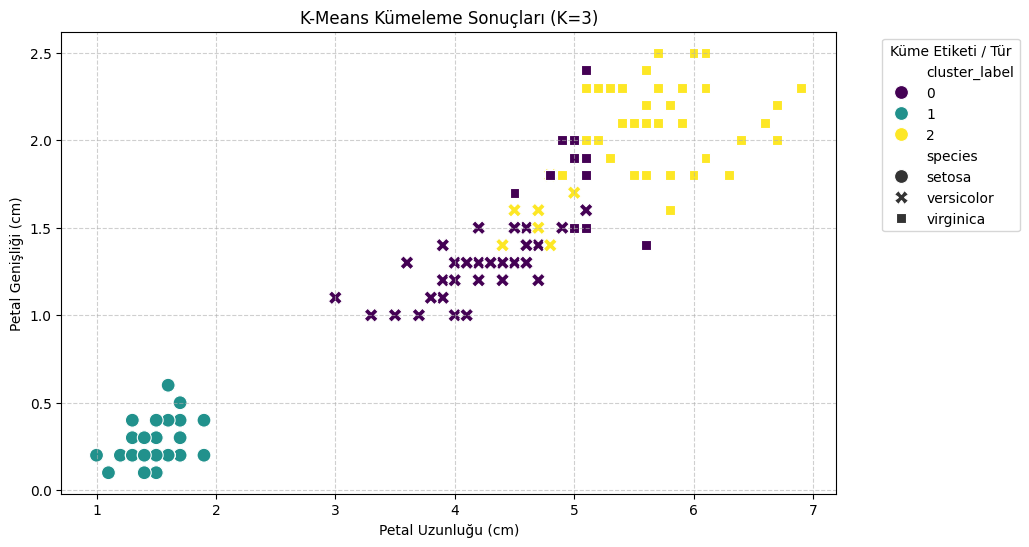


Küme Etiketlerinin Gerçek Türlerle Karşılaştırması:
cluster_label   0   1   2
species                  
setosa          0  50   0
versicolor     39   0  11
virginica      14   0  36


In [19]:
# 5a. Değerlendirme Metrikleri
# Silhouette Skoru: Küme içi sıkılığı ve kümeler arası ayrımı ölçer.
score = silhouette_score(X_scaled, df['cluster_label'])
print(f"\nK={optimal_k} İçin Silhouette Skoru: {score:.4f}")

# 5b. Görselleştirme
# Tüm 4 özelliği görselleştirmek zor olduğu için, en ayırt edici iki özelliği seçelim:
# Petal Uzunluğu (petal length) ve Petal Genişliği (petal width)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['cluster_label'], # Atanan küme etiketine göre renklendir
    palette='viridis',
    style=df['species'], # Orijinal türe göre farklı işaretler kullan (Karşılaştırma için)
    s=100
)

plt.title(f'K-Means Kümeleme Sonuçları (K={optimal_k})')
plt.xlabel('Petal Uzunluğu (cm)')
plt.ylabel('Petal Genişliği (cm)')
plt.legend(title='Küme Etiketi / Tür', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Küme etiketlerinin orijinal türlerle karşılaştırılması
print("\nKüme Etiketlerinin Gerçek Türlerle Karşılaştırması:")
print(pd.crosstab(df['species'], df['cluster_label']))